In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [4]:
in_file_full_name = '../../data/pfas.csv'
data_in_df = pd.read_csv(in_file_full_name)
data_in_df.head()

,disease,PFOS,age,gender,BMI
0,0,11.741246,36,0,23.557257
1,0,3.721879,61,0,21.576156
2,0,5.870561,53,1,24.717870
3,0,22.399261,31,0,23.274264
4,0,9.348789,43,0,27.621793


In [5]:
# log transform PFAS
log_pfas_column_name = f'log_PFOS'
data_in_df[log_pfas_column_name] = np.log(data_in_df['PFOS'])
data_in_df.head()

,disease,PFOS,age,gender,BMI,log_PFOS
0,0,11.741246,36,0,23.557257,2.463108
1,0,3.721879,61,0,21.576156,1.314229
2,0,5.870561,53,1,24.717870,1.769950
3,0,22.399261,31,0,23.274264,3.109028
4,0,9.348789,43,0,27.621793,2.235247


In [6]:
# fit model 1 with only the log_PFOS as the variable
covariate_cols_1 = sm.add_constant(data_in_df['log_PFOS'])
print(covariate_cols_1.head())

   const  log_PFOS
0    1.0  2.463108
1    1.0  1.314229
2    1.0  1.769950
3    1.0  3.109028
4    1.0  2.235247


In [7]:
model_1 = sm.Logit(data_in_df['disease'], covariate_cols_1)
result_1 = model_1.fit()
print(result_1.summary())

Optimization terminated successfully.
         Current function value: 0.690454
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:                disease   No. Observations:                  300
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            1
Date:                Thu, 23 Oct 2025   Pseudo R-squ.:               2.899e-06
Time:                        11:35:03   Log-Likelihood:                -207.14
converged:                       True   LL-Null:                       -207.14
Covariance Type:            nonrobust   LLR p-value:                    0.9724
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1342      0.385      0.348      0.728      -0.621       0.889
log_PFOS       0.0066      0.

In [8]:
print(result_1.params)

const       0.134200
log_PFOS    0.006641
dtype: float64


In [9]:
# fit model 2: add covariates
covariate_cols_2 = sm.add_constant(data_in_df[['log_PFOS', 'age', 'gender', 'BMI']])
covariate_cols_2.head()
model_2 = sm.Logit(data_in_df['disease'], covariate_cols_2)
result_2 = model_2.fit()
print(result_2.summary())

Optimization terminated successfully.
         Current function value: 0.658576
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                disease   No. Observations:                  300
Model:                          Logit   Df Residuals:                      295
Method:                           MLE   Df Model:                            4
Date:                Thu, 23 Oct 2025   Pseudo R-squ.:                 0.04617
Time:                        11:35:07   Log-Likelihood:                -197.57
converged:                       True   LL-Null:                       -207.14
Covariance Type:            nonrobust   LLR p-value:                 0.0007418
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.1764      0.953     -3.332      0.001      -5.045      -1.308
log_PFOS       0.0558      0.

In [10]:
print(result_2.params)

const      -3.176407
log_PFOS    0.055781
age         0.019553
gender      0.549666
BMI         0.072055
dtype: float64


In [11]:
beta_in_result_1 = result_1.params[log_pfas_column_name]
beta_in_result_2 = result_2.params[log_pfas_column_name]
percent_change = 100 *(beta_in_result_2 - beta_in_result_1) / beta_in_result_1
percent_change

np.float64(739.9539684206102)

In [12]:
beta_in_result_1

np.float64(0.006640945097852733)

In [13]:
beta_in_result_2

np.float64(0.05578088189004801)

In [14]:
lr_stat = 2 * (result_2.llf - result_1.llf)
lr_stat

np.float64(19.126635783429037)

In [15]:
df_diff = result_2.df_model - result_1.df_model
df_diff

3.0

In [16]:
p_lrt = stats.chi2.sf(lr_stat, df_diff)
p_lrt

np.float64(0.0002574002276777569)

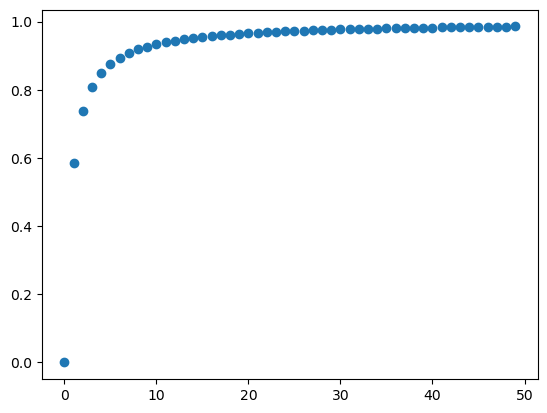

In [17]:
x = np.arange(0, 50, 1)
beta = 0.34
p = x * np.exp(beta) / (1 + x * np.exp(beta))
fig, ax = plt.subplots()
ax.scatter(x, p)

In [18]:
covariate_cols_1_scaled = StandardScaler().fit_transform(covariate_cols_1)
logistic_regression_obj = LogisticRegression()
logistic_regression_obj.fit(X=covariate_cols_1_scaled, y=data_in_df['disease'])

LogisticRegression()

In [19]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0).fit(X, y)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0).fit(X, y)
clf.predict(X[:2, :])